In [151]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat

pi = np.pi

In [152]:
def delta_dm(A, fm, fs, pi):
    return 2 * A * fm * pi / fs

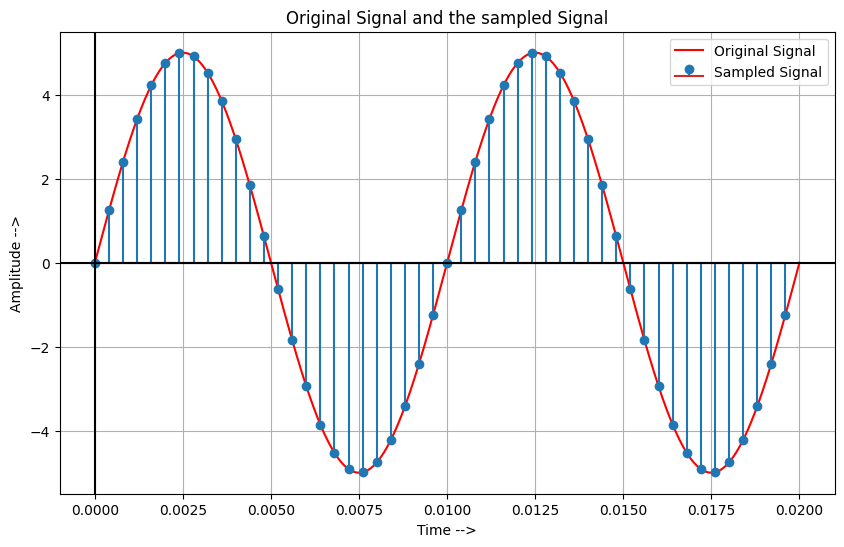

In [153]:
A = 5 #Amplitude for input signal
fm = 100 #Message Frequency
M = 25   #Nyquist Constant
fs = M * fm  #Sampling Frequency
ts = 1 / fs  #Sampling Period
cycles = 2   #Number of cycles
t_org = np.linspace(0, M * cycles * ts, 100000)   #Points for original signal
t_sam = np.arange(0, M * cycles * ts, ts)         #Points for sampled signal
x_org = A * np.sin(2 * pi * fm * t_org)           #Original signal
x_sam = A * np.sin(2 * pi * fm * t_sam)           #Sampled Signal

plt.figure(figsize=(10,6))
plt.plot(t_org, x_org, color = 'red')
plt.stem(t_sam,x_sam)
plt.title('Original Signal and the sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.legend(['Original Signal', 'Sampled Signal'], loc = 'upper right')
plt.grid(True)
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.show()

In [154]:
delta = delta_dm(A,fm,fs,pi)
# delta = 2
print(delta)

1.2566370614359172


In [155]:
len_org = (len(t_org))
len_sam = len(t_sam)

In [156]:
length = int(len_org / len_sam) #length fow which we will have to run the repetition list

In [157]:
value = x_sam[0]  #Temp variable 
Dm_list = []

for i in range(0,len_sam):
    if i == 0:
        Dm_list.extend(repeat(value,length))
        value += delta
    else:
        error = x_sam[i] - x_sam[i - 1]
        if delta <= abs(value):
            if (error > 0):
                Dm_list.extend(repeat(value,length))
                if (error < delta):
                    pass
                if (value <= A ):
                    value = value + delta
                
            else:
                Dm_list.extend(repeat(value,length))
                if (error < delta):
                    pass
                if (value >= -(A) ):
                    value = value - delta
        else:
            Dm_list.extend(repeat(value,length))
            if (x_sam[i - 1] > 0):
                value = value - delta
            if (x_sam[i - 1] < 0):
                value = value + delta
            
print(len(Dm_list))

100000


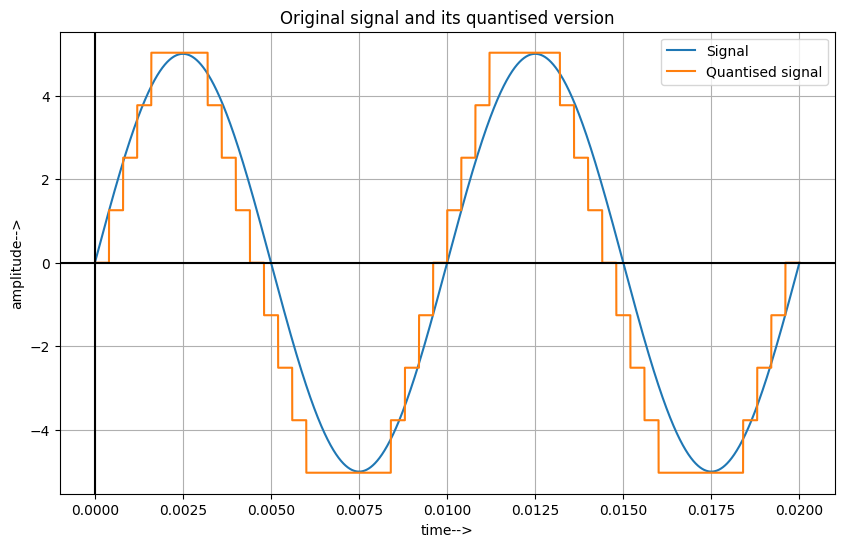

In [160]:
plt.figure(figsize=(10,6))
plt.plot(t_org, x_org)
plt.plot(t_org, Dm_list)
plt.xlabel("time-->")
plt.ylabel("amplitude-->")
plt.title("Original signal and its quantised version")
plt.legend(['Signal', 'Quantised signal'], loc = "upper right")
plt.axhline( y = 0, color = 'black')
plt.axvline( x = 0, color = 'black')
plt.grid(True)

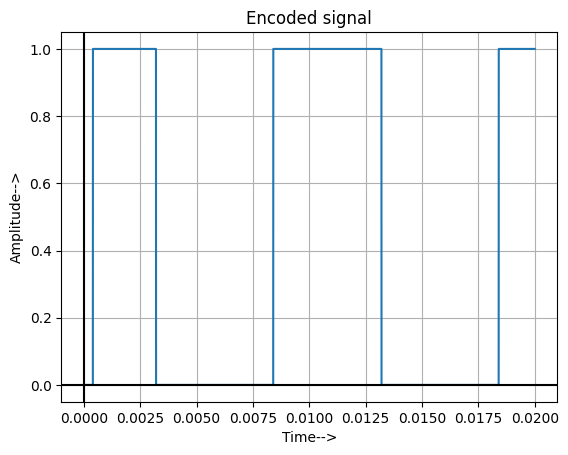

In [163]:
#To perform encoding of the signal
encoded = []
i = 0
while i < len(x_org):
    if i == 0:
        encoded.extend(repeat(0,length))
    else:
        diff = Dm_list[i] - Dm_list[i - length]
        if diff > 0:
            encoded.extend(repeat(1,length))
        elif diff < 0:
            encoded.extend(repeat(0,length))
        else:
            if Dm_list[i] > 0:
                encoded.extend(repeat(1,length))
            else:
                encoded.extend(repeat(0,length))

    i = i + length

plt.plot(t_org,encoded)
plt.title('Encoded signal')
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.grid(True)